In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")
data

,size,thread_count,sum,time
0,100,1,545,7
1,100,2,545,181
2,100,3,545,179
3,100,4,545,151
4,100,5,545,135
...,...,...,...,...
1115,100000000,12,549934579,214695
1116,100000000,16,549934579,243054
1117,100000000,100,549934579,216085
1118,100000000,500,549934579,218438


In [33]:
by_threads

thread_count  size     
1             100               4.2
              1000             17.0
              10000           157.5
              100000         1488.3
              1000000       14794.1
                             ...   
2000          10000         49258.4
              100000        48500.6
              1000000       49891.2
              10000000      52971.9
              100000000    241185.7
Name: time, Length: 112, dtype: float64

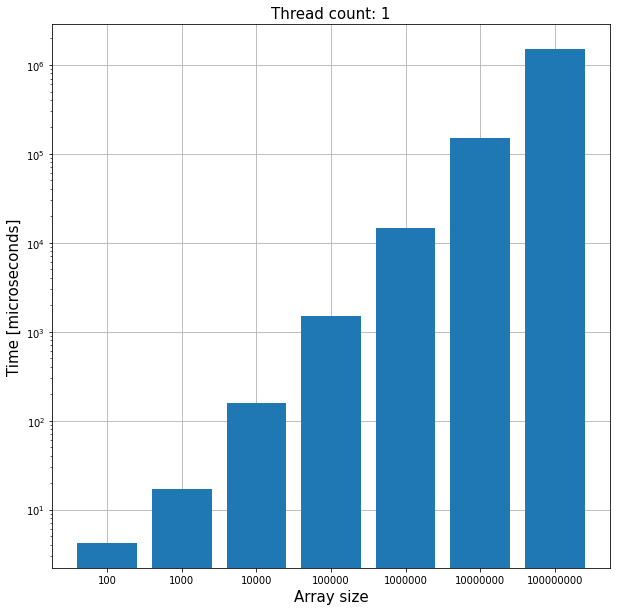

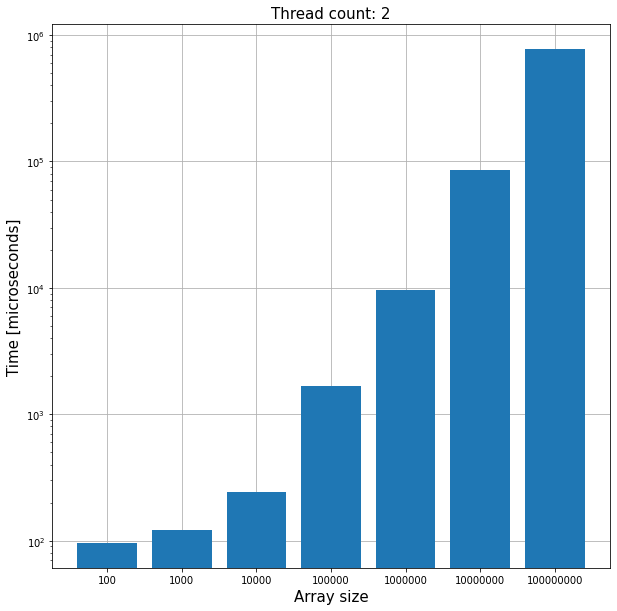

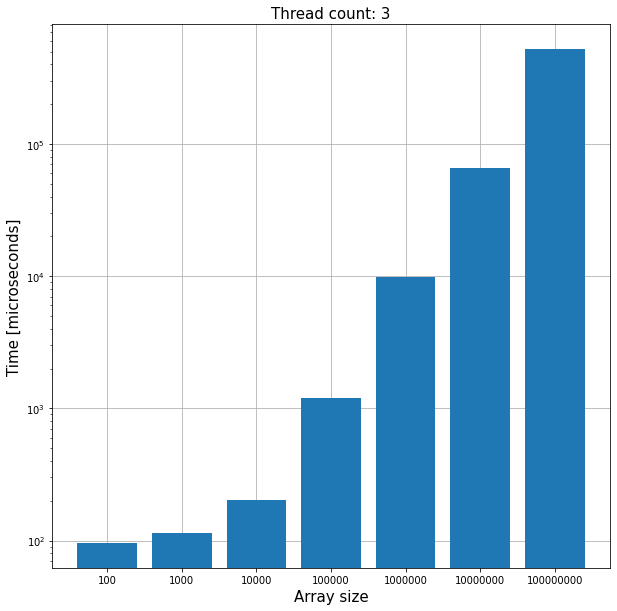

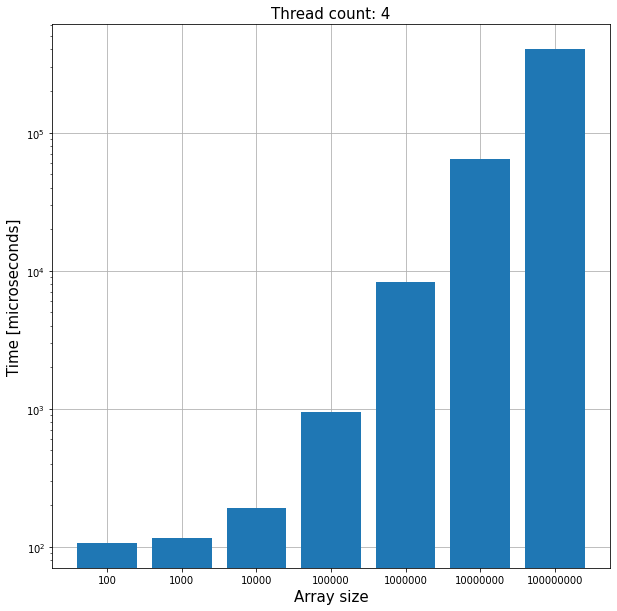

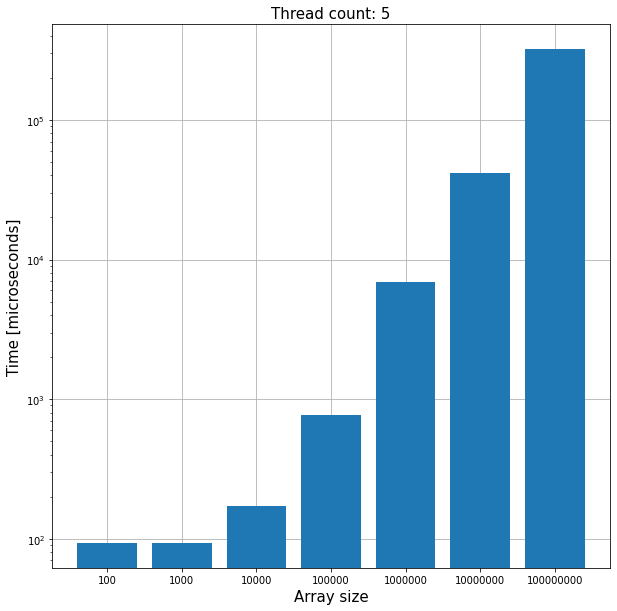

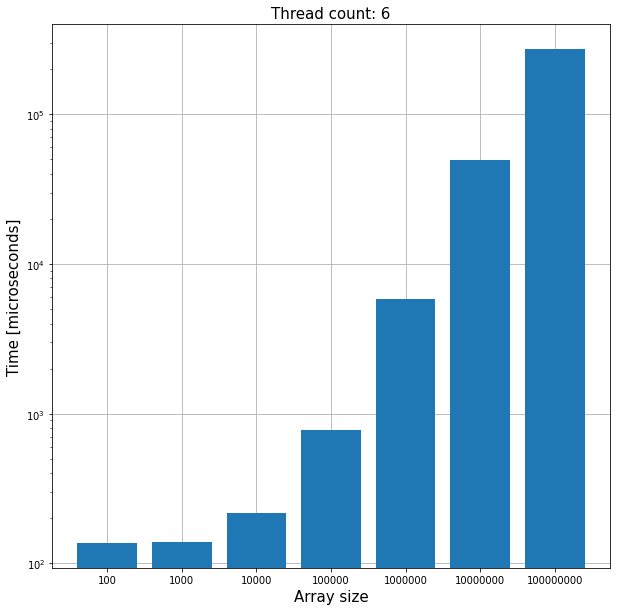

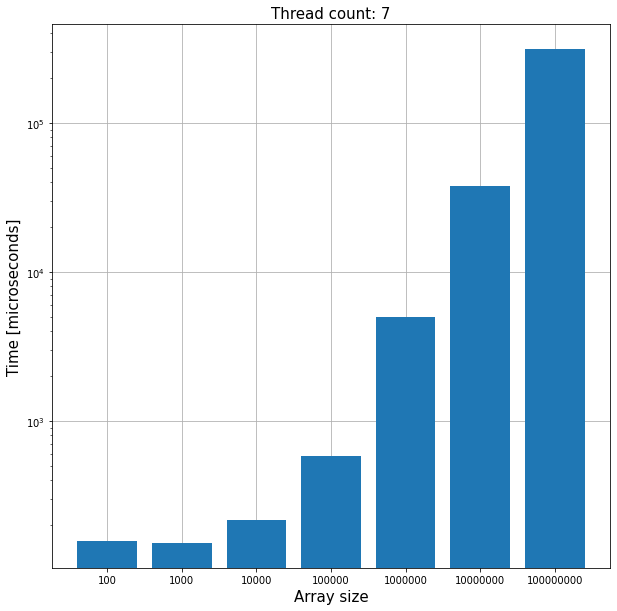

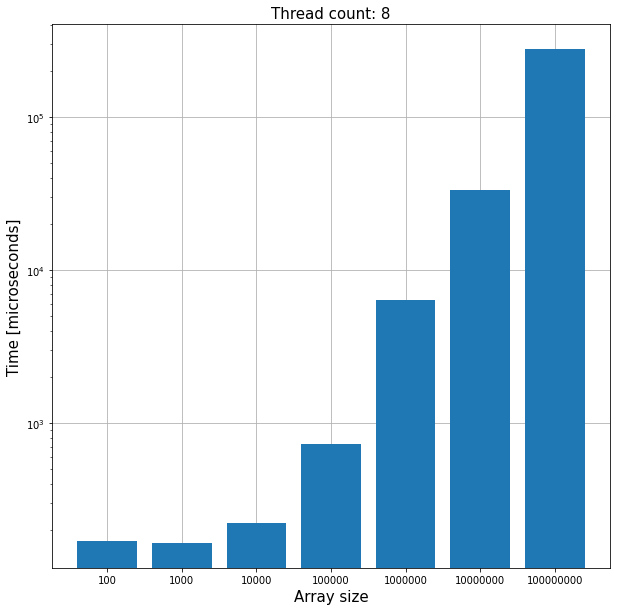

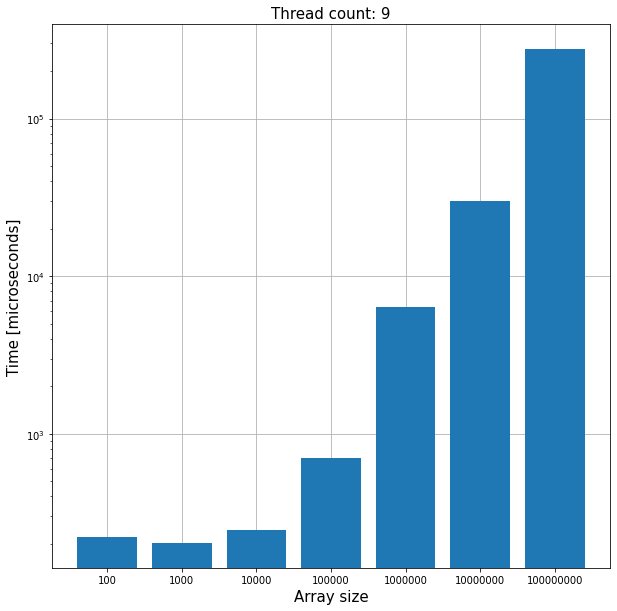

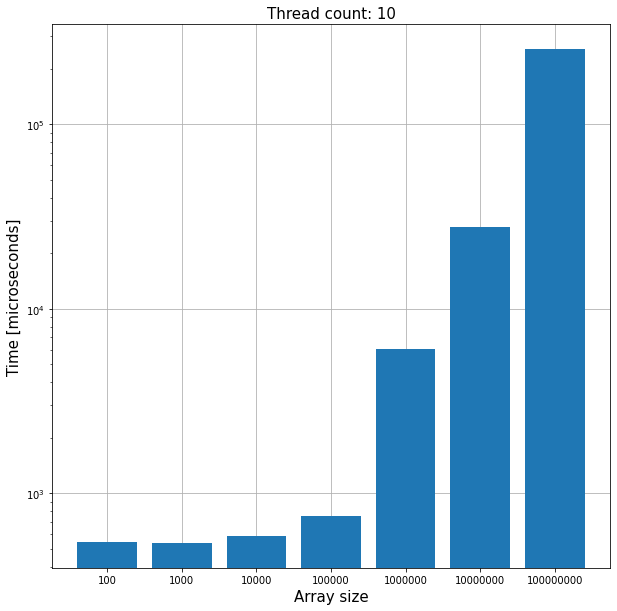

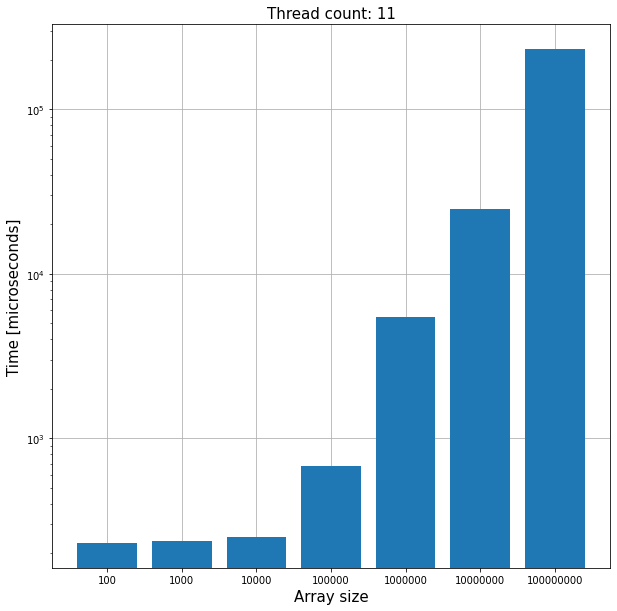

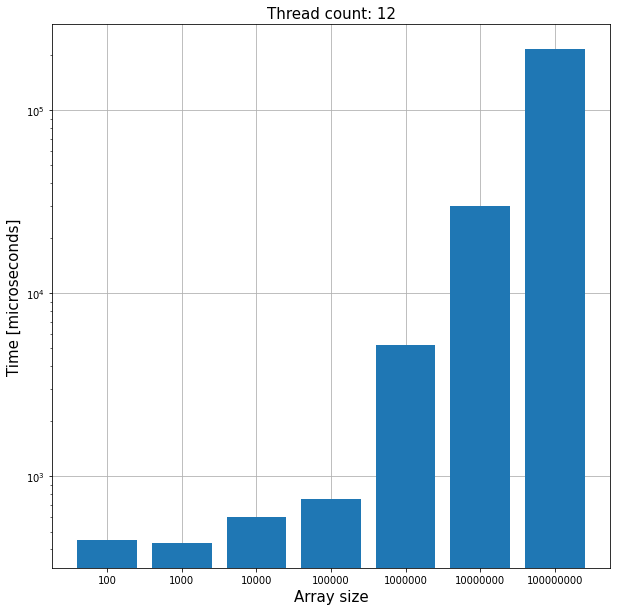

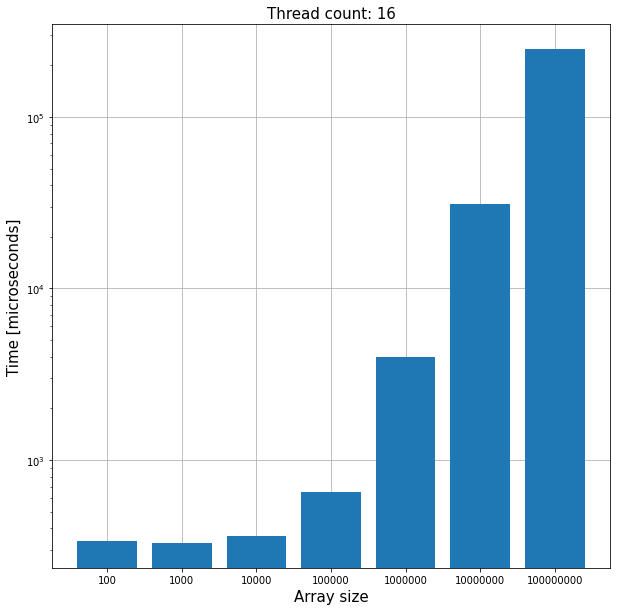

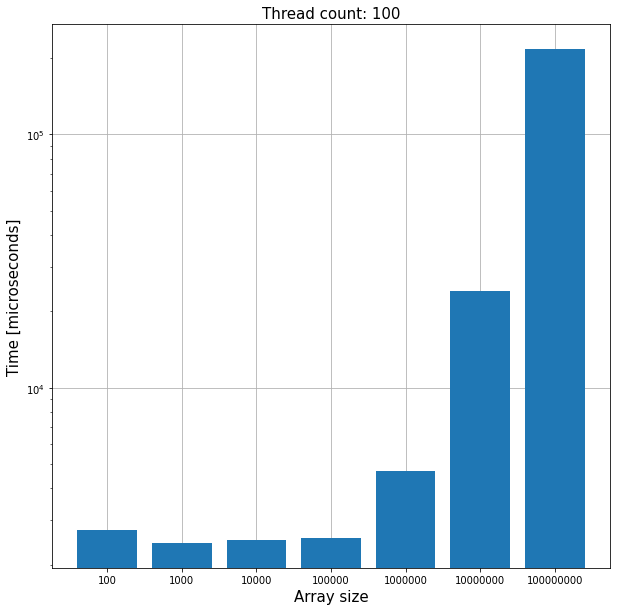

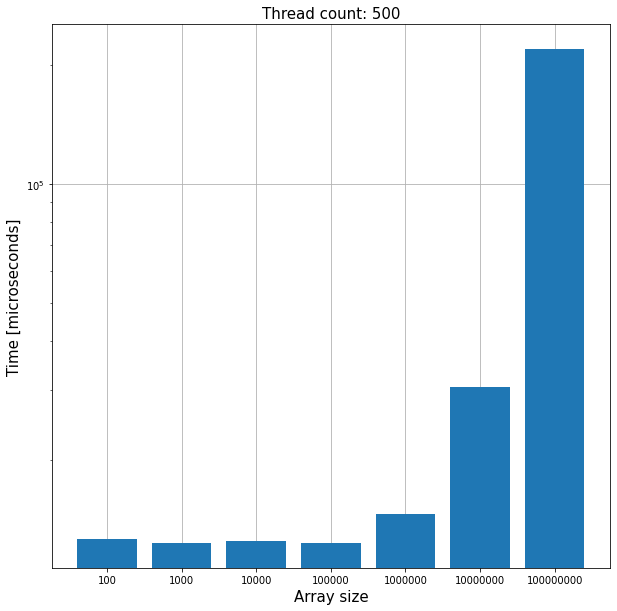

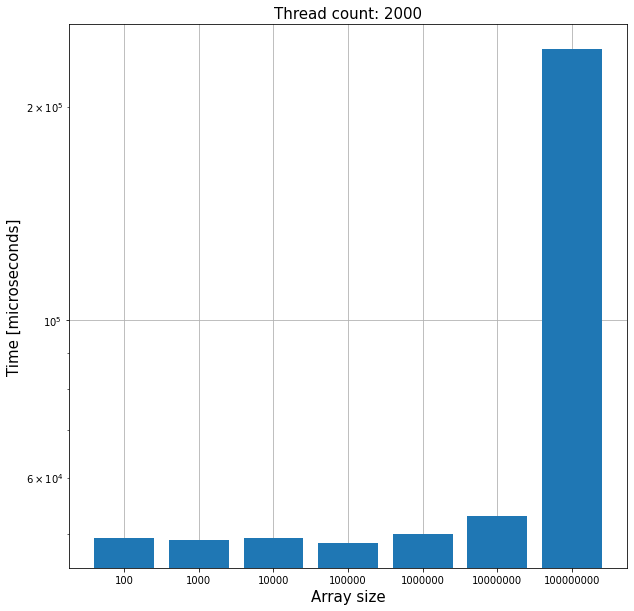

In [65]:
by_threads = data.groupby(["thread_count", "size"]).mean()["time"]

unique_threads = data["thread_count"].unique()
fs = 15
for thread_count in unique_threads:
    plt.figure(figsize=(10,10))
    plt.title(f"Thread count: {thread_count}", fontsize=fs)
    plt.xlabel("Array size", fontsize=fs)
    plt.ylabel("Time [microseconds]", fontsize=fs)
    plt.yscale("log")
    plt.grid()
    
    times = by_threads.loc[thread_count]
    
    sizes = np.array([*map(str,times.index.to_numpy())])
    times = times.to_numpy()

    plt.bar(sizes, times, 0.8, zorder=100)
    plt.plot()
    plt.savefig(f"../pictures/thread_count_{thread_count}.png")

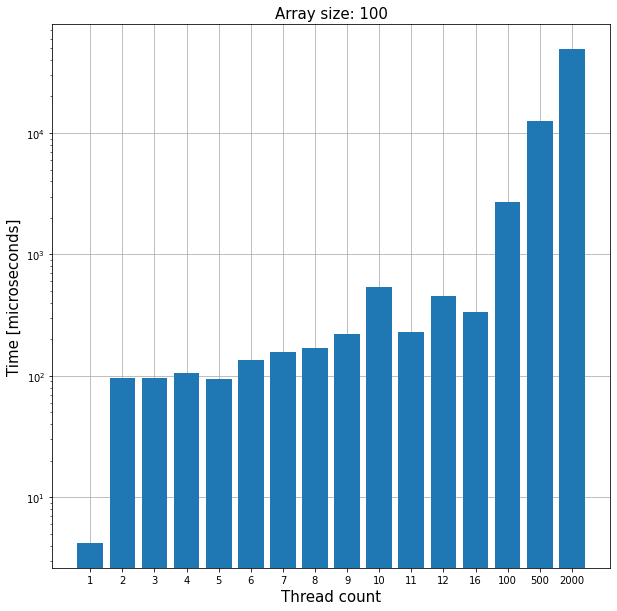

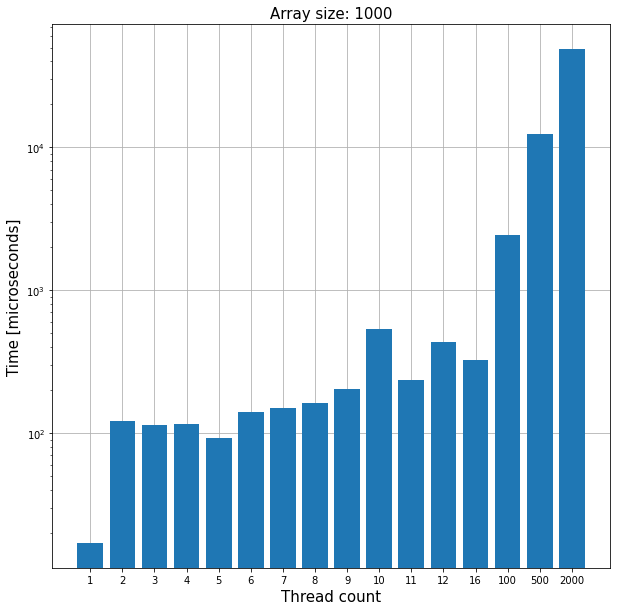

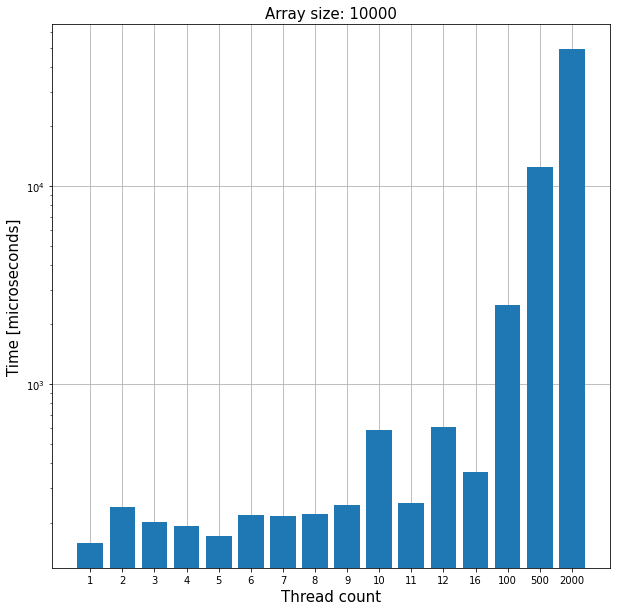

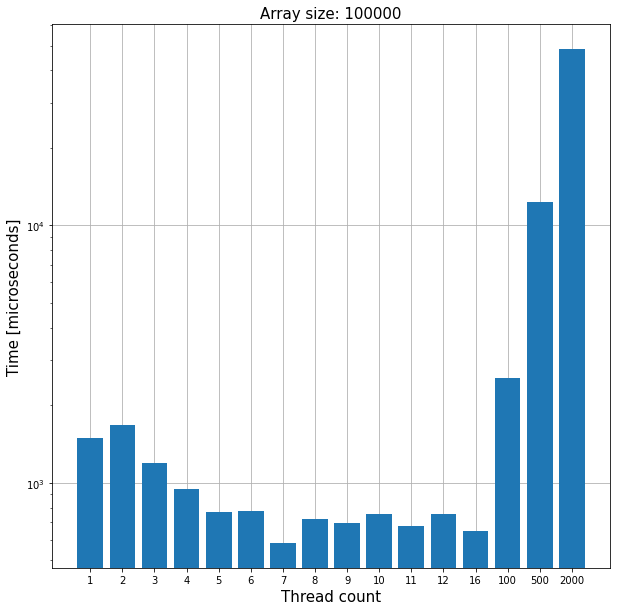

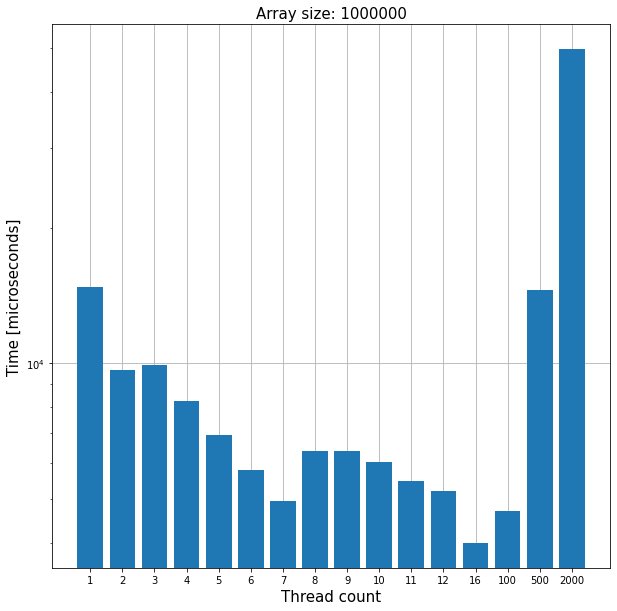

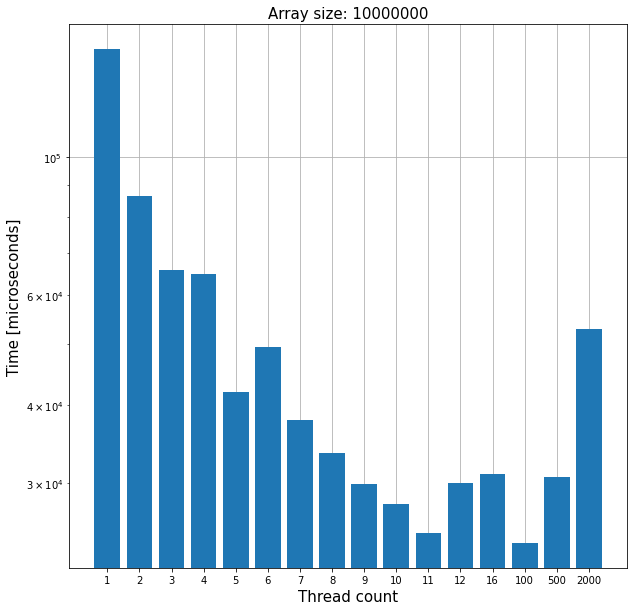

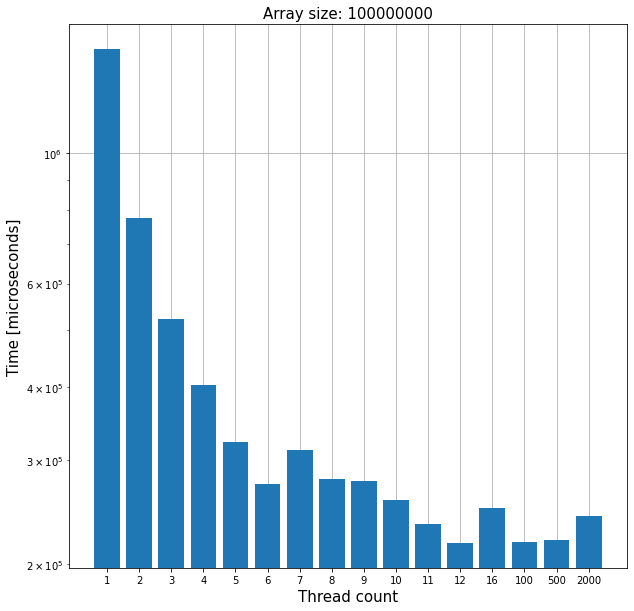

In [68]:
by_sizes = data.groupby(["size", "thread_count"]).mean()["time"]

unique_sizes = data["size"].unique()
fs = 15
for size in unique_sizes:
    plt.figure(figsize=(10,10))
    plt.title(f"Array size: {size}", fontsize=fs)
    plt.xlabel("Thread count", fontsize=fs)
    plt.ylabel("Time [microseconds]", fontsize=fs)
    plt.yscale("log")
    plt.grid()
    
    times = by_sizes.loc[size]
    
    thread_counts = np.array([*map(str,times.index.to_numpy())])
    times = times.to_numpy()

    plt.bar(thread_counts, times, 0.8, zorder=100)
    plt.plot()
    plt.savefig(f"../pictures/size_{size}.png")

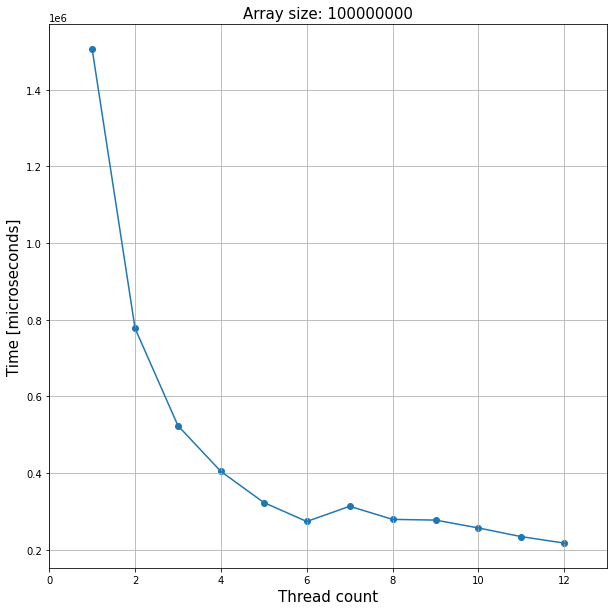

In [83]:
times = by_sizes[100_000_000]

slc = slice(None, 12)

thread_counts = times.index.to_numpy()
times = times.to_numpy()

X = thread_counts[slc]
Y = times[slc]

plt.figure(figsize=(10,10))
plt.title(f"Array size: {100_000_000}", fontsize=fs)
plt.xlabel("Thread count", fontsize=fs)
plt.ylabel("Time [microseconds]", fontsize=fs)
plt.grid()
plt.xlim(0, 13)

plt.scatter(X, Y)
plt.plot(X, Y)

plt.savefig("../pictures/scatter_size_100000000.png")